<a href="https://colab.research.google.com/github/mahmoudhaney/BreastCancerPrediction/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

# **Preparing & Preprocessing Dataset**

### Data Collection & Analysis

In [ ]:
# Load data file
breast_cancer = pd.read_csv('data.csv')

In [2]:
# Or -> Load data from sklearn
breast_cancer = sklearn.datasets.load_breast_cancer()

In [4]:
# Load data to panads dataframe
data_frame = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [5]:
# Print first 5 rows in data table
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Show some information about data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#make the label column equal the target column and add it to dataframe
data_frame['label'] = breast_cancer.target

In [9]:
#check for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
# Check distrbution of target values
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [10]:
# Show different mean to both malignant and bengin
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Separating The Dataset

In [11]:
x = data_frame.drop(columns='label',axis=1)
y = data_frame['label']

In [12]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [13]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


## Data Standardization

In [15]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
x = standardized_data

# **Spilting the dataset - Training & Testing**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)
print("The Whole Data    => ", x.shape,
      "\nThe Training Data => ", x_train.shape,
      "\nThe Test Data     => ", x_test.shape)

(569, 30) (426, 30) (143, 30)
(569,) (426,) (143,)
The Whole Data    =>  (569, 30) 
The Training Data =>  (426, 30) 
The Test Data     =>  (143, 30)


# **1. Logistic Regression**

## Training The Model

In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Accuracy

In [18]:
# Accuracy Score of Training Data
x_train_predict=model.predict(x_train)
train_accuracy=accuracy_score(y_train,x_train_predict)
print("Accuracy for training dataset ->", train_accuracy*100)

Accuracy for training dataset -> 98.82629107981221


In [19]:
# Accuracy Score of Testing Data
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_predict)
print("Accuracy for testing dataset ->", test_data_accuracy*100)

Accuracy for testing dataset -> 97.2027972027972


## Confusion Matrix

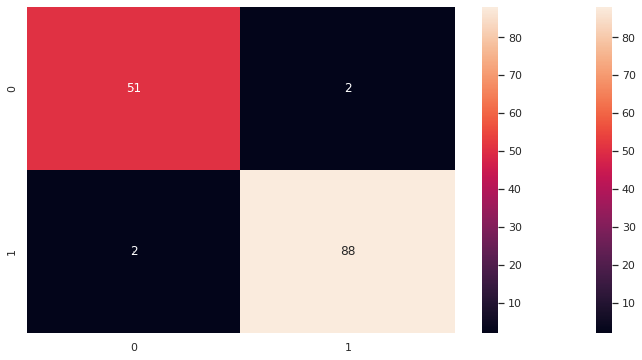

In [40]:
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, x_test_predict)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (12,6))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 2}) # font size
sn.heatmap(df_cm, annot=True)

## Accuracy Curve

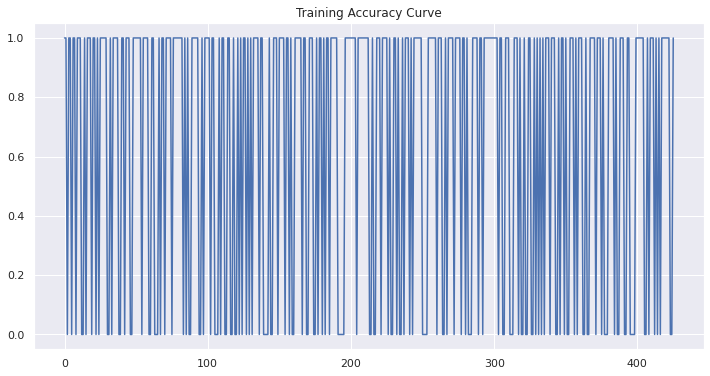

In [70]:
# For Training Data
plt.figure(figsize = (12,6))
plt.plot(x_train_predict)
plt.title('Training Accuracy Curve')
plt.show()

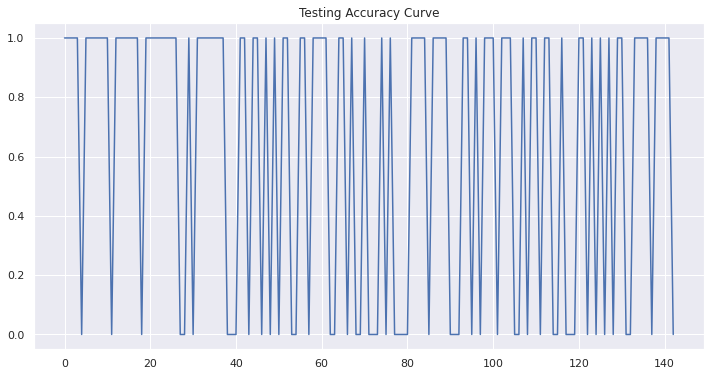

In [71]:
# For Testing Data
plt.figure(figsize = (12,6))
plt.plot(x_test_predict)
plt.title('Testing Accuracy Curve')
plt.show()

## ROC Curve

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Text(0, 0.5, 'True Positive Rate')

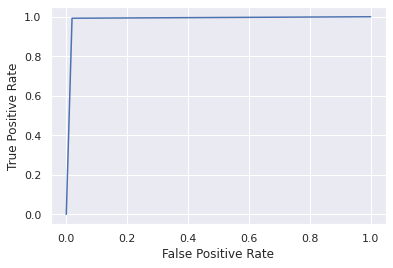

In [73]:
# For Training Data
fpr, tpr, thresholds = roc_curve(y_train, x_train_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

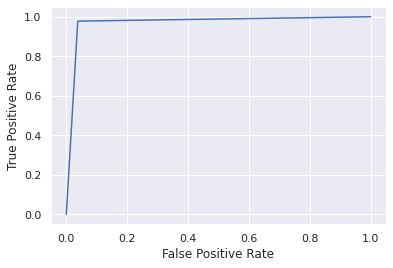

In [74]:
# For Testing Data
fpr, tpr, thresholds = roc_curve(y_test, x_test_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

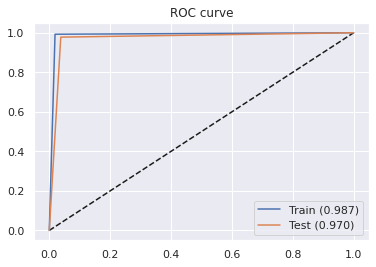

In [75]:
# For Training Data & Testing Data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, x_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, x_test_predict)


auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Train ({:.3f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test ({:.3f})'.format(auc_test))
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("\n")

## A Predictive System

In [ ]:
# Input values for testing the model
# Malignant
data_input_1 = (14.68,20.13,94.74,684.5,0.09867,0.072,0.07395,0.05259,0.1586,0.05922,0.4727,1.24,3.195,45.4,0.005718,0.01162,0.01998,0.01109,0.0141,0.002085,19.07,30.88,123.4,1138,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216)
# Benign
input_data_2 = (13.08,15.71,85.63,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183)

# Change the input list to numpy array
input_data_numpy_array = np.asarray(data_input_1)

# Reshape the numpy array for one instance
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

# Standardized the input data
std_data = scaler.transform(input_data_reshaped)

# Prediction Result
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Malignant خبيث --> There is Breast Cancer ):')
else:
  print('Benign حميد --> There is no Breast Cancer (:')

[0]
Malignant خبيث --> There is Breast Cancer ):


# **2. Artificial Neural Network - ANN**

## Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
import warnings
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D
from keras.regularizers import l2
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

## Model Training

In [ ]:
ann = Sequential()
ann.add(Dense(units=2500, activation='relu'))
ann.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
ann.add(Dense(units=64, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)
historic =ann.fit(x_train, y_train, batch_size = 32, epochs = 100,validation_split=0.2, verbose=1, callbacks=[checkpoint])
print(ann.evaluate(x_test, y_test))
print(ann.metrics_names)

Epoch 1/100
10/11 [==========================>...] - ETA: 0s - loss: 0.8645 - accuracy: 0.9156 
Epoch 1: val_loss improved from inf to 0.59305, saving model to weights.h5
11/11 [==============================] - 1s 36ms/step - loss: 0.8459 - accuracy: 0.9206 - val_loss: 0.5930 - val_accuracy: 0.9419
Epoch 2/100
 8/11 [====================>.........] - ETA: 0s - loss: 0.5311 - accuracy: 0.9688
Epoch 2: val_loss improved from 0.59305 to 0.38964, saving model to weights.h5
11/11 [==============================] - 0s 14ms/step - loss: 0.4974 - accuracy: 0.9765 - val_loss: 0.3896 - val_accuracy: 0.9767
Epoch 3/100
10/11 [==========================>...] - ETA: 0s - loss: 0.3377 - accuracy: 0.9844
Epoch 3: val_loss improved from 0.38964 to 0.26100, saving model to weights.h5
11/11 [==============================] - 0s 14ms/step - loss: 0.3329 - accuracy: 0.9853 - val_loss: 0.2610 - val_accuracy: 0.9767
Epoch 4/100
10/11 [==========================>...] - ETA: 0s - loss: 0.2221 - accuracy: 0.9

## Save the Model

In [ ]:
ann.save('ann.h5')

## Model Evaluation

In [ ]:
y_pred_ann = ann.predict(x_test)
y_pred_ann = (y_pred_ann > 0.5)
cm = confusion_matrix(y_test, y_pred_ann)
print("Accuracy: " ,accuracy_score(y_test, y_pred_ann)*100)

5/5 [==============================] - 0s 3ms/step
Accuracy:  95.8041958041958


## Accuracy Plots

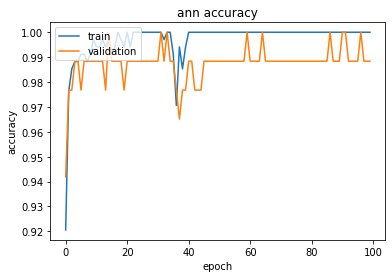

In [ ]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('ann accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Loss Plots

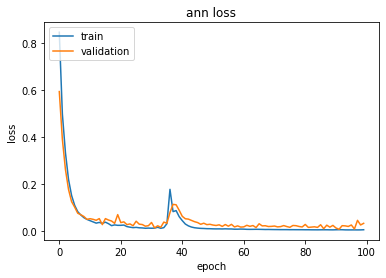

In [ ]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('ann loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Seaborn Confusion Matrix

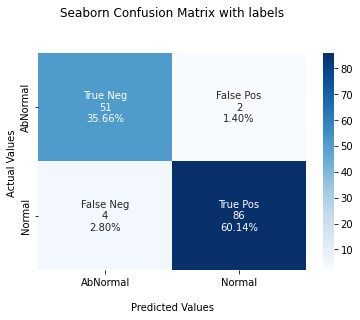

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['AbNormal','Normal'])
ax.yaxis.set_ticklabels(['AbNormal','Normal'])
plt.show()

## Ploting Learning Curves

### Ploting for Training Data

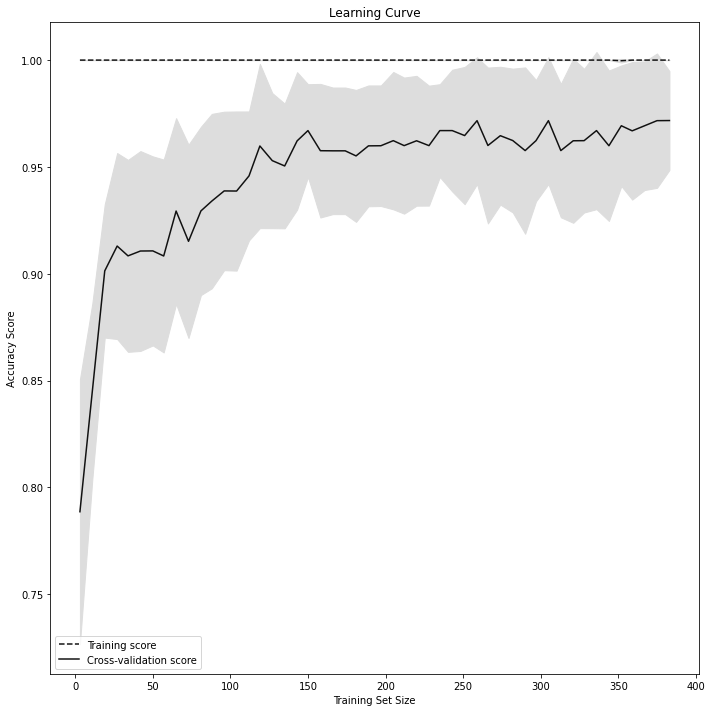

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Ploting for Testing Data

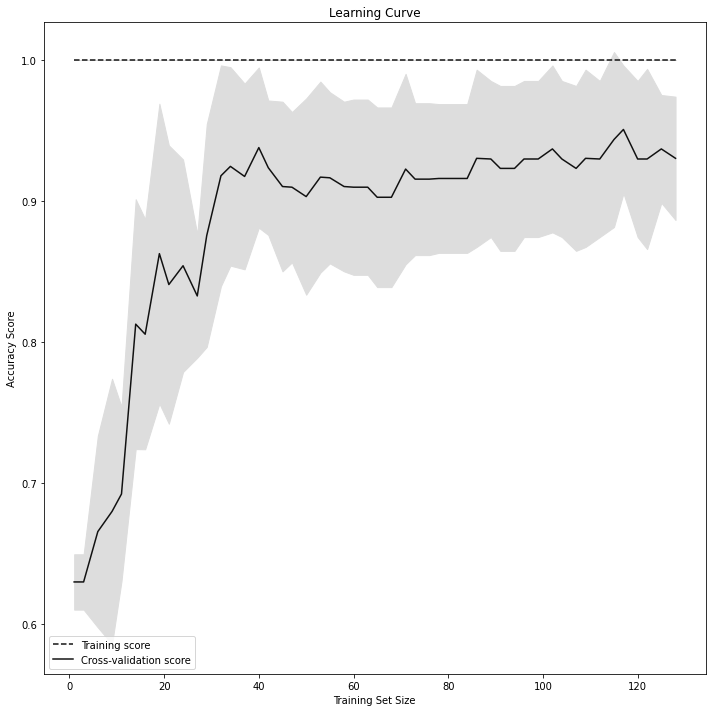

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), x_test, y_test, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Ploting for normal data

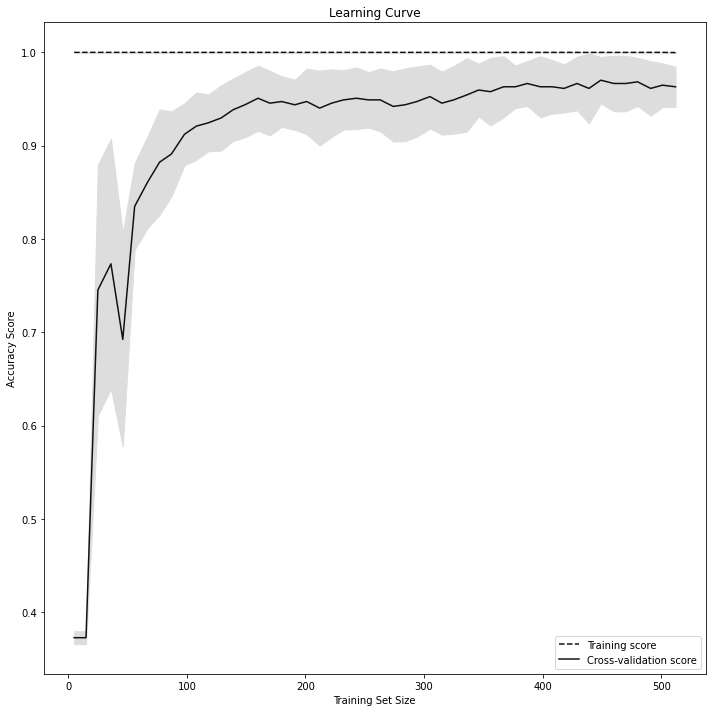

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), x, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# **3. SVM**

## Model Training

In [41]:
from sklearn import svm
from sklearn.svm import SVC

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

## Model Accuracy

In [42]:
# Accuracy Score of Training Data
x_train_predict=model.predict(x_train)
train_accuracy=accuracy_score(y_train,x_train_predict)
print("Accuracy for training dataset ->", train_accuracy*100)

Accuracy for training dataset -> 98.82629107981221


In [43]:
# Accuracy Score of Testing Data
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_predict)
print("Accuracy for testing dataset ->", test_data_accuracy*100)

Accuracy for testing dataset -> 97.2027972027972


## Seaborn Confusion Matrix

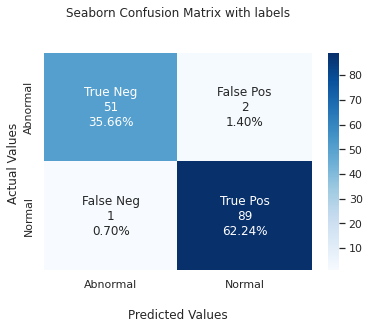

In [55]:
import seaborn as sns

y_pred_svm = classifier.predict(x_test)
y_pred_svm = (y_pred_svm > 0.5)
y_pred_svm = classifier.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svm.flatten()/np.sum(cm_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_svm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Abnormal','Normal'])
ax.yaxis.set_ticklabels(['Abnormal','Normal'])

plt.show()

## Accuracy Curve

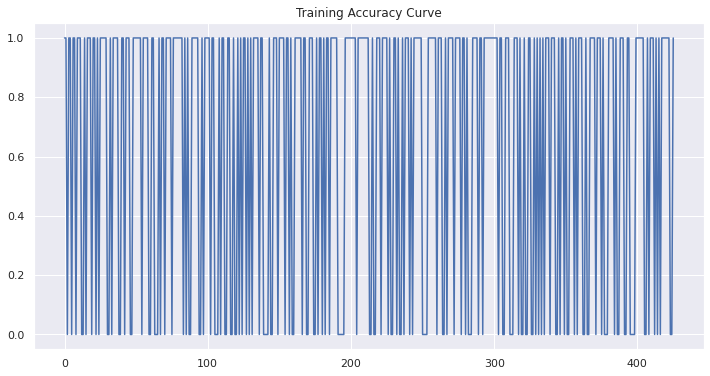

In [66]:
# For Training Data
plt.figure(figsize = (12,6))
plt.plot(x_train_predict)
plt.title('Training Accuracy Curve')
plt.show()

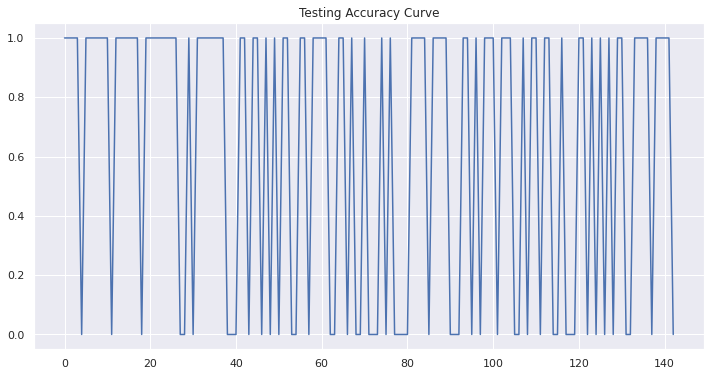

In [67]:
# For Testing Data
plt.figure(figsize = (12,6))
plt.plot(x_test_predict)
plt.title('Testing Accuracy Curve')
plt.show()

## ROC Curve

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Text(0, 0.5, 'True Positive Rate')

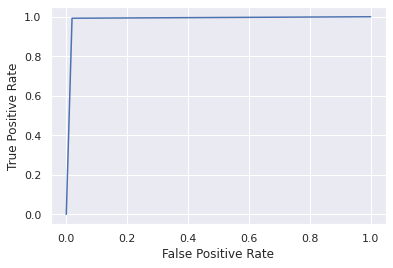

In [57]:
# For Training Data
fpr, tpr, thresholds = roc_curve(y_train, x_train_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

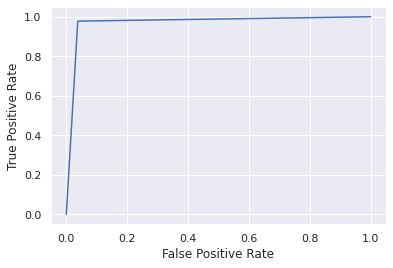

In [54]:
# For Testing Data
fpr, tpr, thresholds = roc_curve(y_test, x_test_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

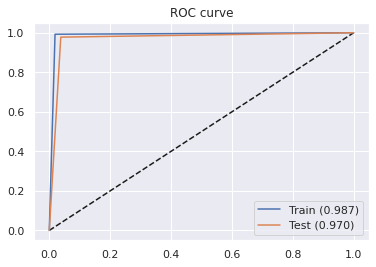

In [62]:
# For Training Data & Testing Data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, x_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, x_test_predict)


auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Train ({:.3f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test ({:.3f})'.format(auc_test))
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("\n")